In [1]:
# test display file root

import sys
import matplotlib.pyplot as plt
import numpy as np    
import cygno as cy
import ROOT

Welcome to JupyROOT 6.24/06


# mostra tutte le imagini e tracce del file ROOT

Open file: https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygnus/Data/LAB/histograms_Run03944.root
Find Keys: 1000
# of Images (TH2) Files: 1000 
# of Waveform (TH2) Files: 0 
Camera X, Y pixel: 2304 2304 


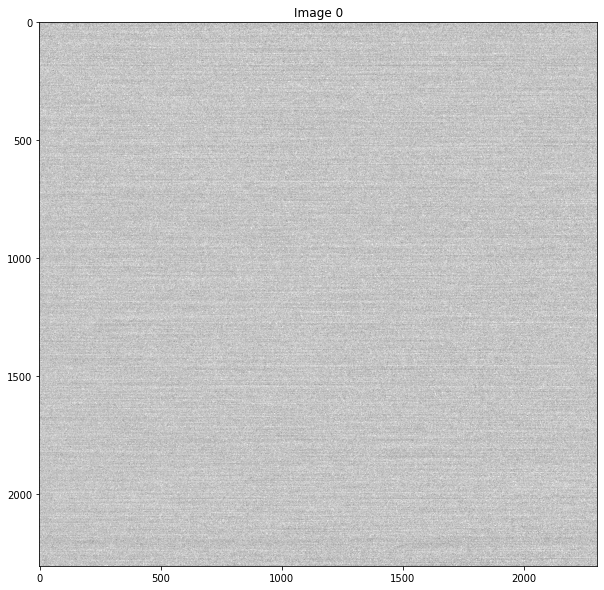

In [26]:
cfile = cy.open_(run=3944, tag='LAB', posix=False, verbose=True)
if cfile.max_wfm > 0:
    wfm_module=int(cfile.max_wfm/cfile.max_pic)

for iTr in range(1):
    fig, ax = plt.subplots (1, figsize=(10,10))
    image = cy.pic_(cfile, iTr)
    ax.imshow(image,  cmap="gray", vmin=85,vmax=105, aspect="auto")
    ax.set_title("Image {:d}".format(iTr))
    plt.plot()
    if cfile.max_wfm > 0:
        if wfm_module>10: 
            max_wfm_module = 10
        else:
            max_wfm_module = wfm_module
        fig, ax = plt.subplots (max_wfm_module, figsize=(10,10))
        for iWf in range(max_wfm_module):   
            #print (iTr, iWf, iTr*wfm_module+iWf)
            t,a = cy.wfm_(cfile, iTr, iWf)
            ax[iWf].plot(t,a)
            ax[iWf].set_title("Wavefor {:d}".format(iWf))
        plt.plot()

In [25]:
cfile.y_resolution

2304

In [3]:
run = 5790
cfile = cy.open_(run=run, tag='LAB', posix=False, verbose=True)
image = cy.pic_(cfile,1)
cy.run_info_logbook(run, sql=True, verbose=True)

Open file: https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygno-data/LAB/histograms_Run05790.root
Find Keys: 400
# of Images (TH2) Files: 400 
# of Waveform (TH2) Files: 0 
Camera X, Y pixel: 2304 2304 
[]
NO RUN 5790 found in history


,Run number,RunDescription,Start time,Stop time,Number of events,Exposure_sec,OFFSET_V,GEM3_V,GEM2_V,GEM1_V,T2_V,T1_V,DRIFT_V,HV_STATE,GEMGeometry_id


INFO: mean: 101.27, sigma: 119.23, N out of range: 23824 < vmin=90, 431 > vmax=130, insane: 0


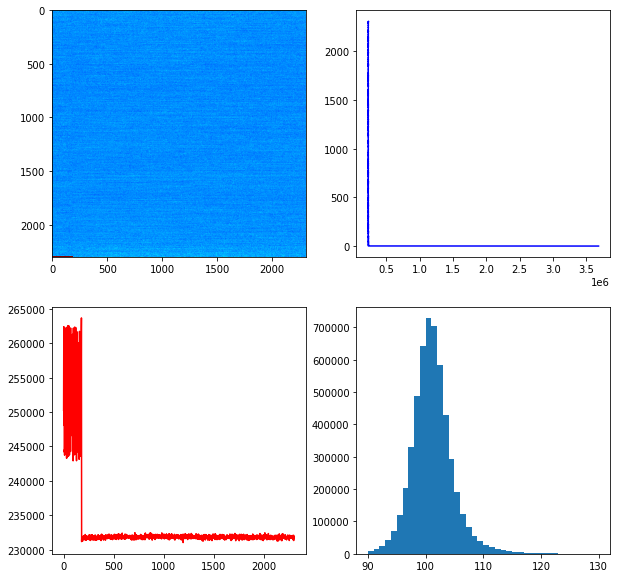

In [4]:
cy.img_proj(image, vmin=90, vmax=130, log=False)

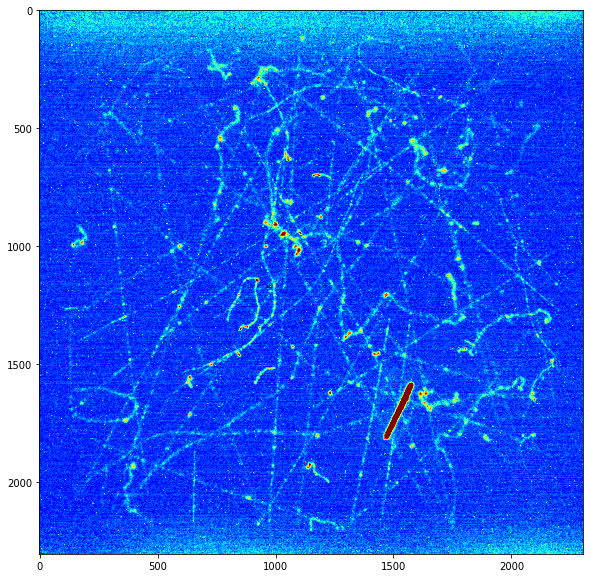

In [4]:
fig, ax = plt.subplots (1, figsize=(10,10))
ax.imshow(image,cmap="jet", vmin=95, vmax=130)
#ax.invert_yaxis()
plt.show()

In [6]:
import cygno as cy
run = 5320
pedpath = '/jupyter-workspace/cloud-storage/cygno-analysis/'
m_image, s_image = cy.ped_(run, path=pedpath+'ped/', verbose=False)

RELOAD maen file: /jupyter-workspace/cloud-storage/cygno-analysis/ped/mean_Run05320 sigma file: /jupyter-workspace/cloud-storage/cygno-analysis/ped/sigma_Run05320


In [7]:
!ls $pedpath/ped/

mean_Run05300.root  mean_Run05454.root	 sigma_Run05361.root
mean_Run05301.root  mean_Run05456.root	 sigma_Run05362.root
mean_Run05302.root  mean_Run05461.root	 sigma_Run05363.root
mean_Run05303.root  mean_Run05464.root	 sigma_Run05364.root
mean_Run05304.root  mean_Run05465.root	 sigma_Run05365.root
mean_Run05305.root  mean_Run05466.root	 sigma_Run05366.root
mean_Run05306.root  mean_Run05467.root	 sigma_Run05367.root
mean_Run05307.root  mean_Run05468.root	 sigma_Run05368.root
mean_Run05308.root  mean_Run05469.root	 sigma_Run05369.root
mean_Run05309.root  mean_Run05472.root	 sigma_Run05370.root
mean_Run05310.root  mean_Run05473.root	 sigma_Run05371.root
mean_Run05311.root  mean_Run05474.root	 sigma_Run05372.root
mean_Run05312.root  mean_Run05475.root	 sigma_Run05373.root
mean_Run05313.root  mean_Run05476.root	 sigma_Run05374.root
mean_Run05314.root  mean_Run05480.root	 sigma_Run05375.root
mean_Run05315.root  mean_Run05482.root	 sigma_Run05376.root
mean_Run05316.root  mean_Run05484.root	 

/jupyter-workspace/cloud-storage/cygno-analysis/ped/mean_Run05320.root /jupyter-workspace/cloud-storage/cygno-analysis/ped/sigma_Run05320.root


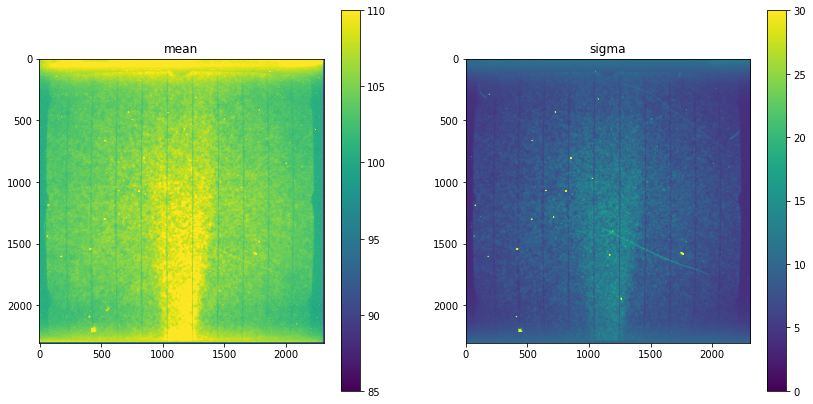

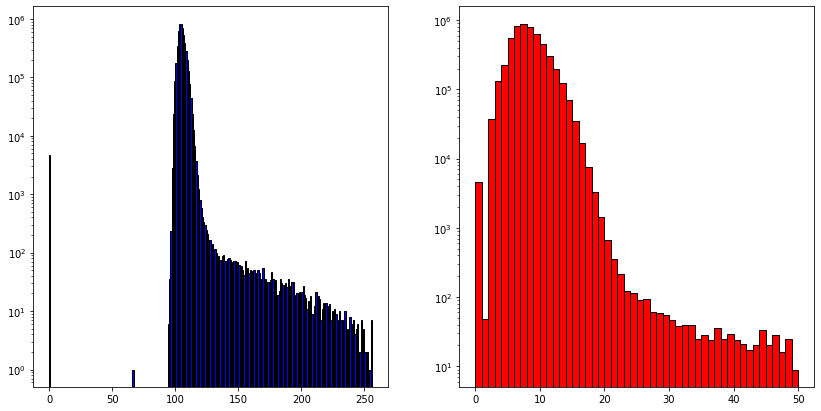

In [8]:
import ROOT
#run = 5320 #5318# 4904# senza sorgente #5312 1 sec
fileoutm = (pedpath+"ped/mean_Run{:05d}".format(run))
fileouts = (pedpath+"ped/sigma_Run{:05d}".format(run))
print(fileoutm+".root", fileouts+".root")
try:
    imagem = cy.read_(ROOT.TFile.Open(fileoutm+".root"))
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
try: 
    images = cy.read_(ROOT.TFile.Open(fileouts+".root"))
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)


fig, ax = plt.subplots(1,2, figsize=(14,7))
im = ax[0].imshow(imagem, vmin=85,vmax=110)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("mean")
ax[1].set_title("sigma")
im = ax[1].imshow(images, vmin=0,vmax=30)
fig.colorbar(im, ax=ax[1])
plt.show()
fig, ax = plt.subplots(1,2,  figsize=(14,7))
ax[0].hist(imagem.ravel(), bins=256, range=(0.0, 256.0), fc='b', ec='k')
ax[1].hist(images.ravel(), bins=50, range=(0.0, 50.0), fc='r', ec='k')
ax[0].set_yscale("log")
ax[1].set_yscale("log")

plt.show()

In [ ]:
f = ROOT.TFile.Open(fileoutm+".root")
h = ROOT.TH2D("h1","Machine A + B",2304,0,2304,2304,0,2304);
h = f.Get('pic_run')

c = ROOT.TCanvas();
#h.Draw()
#c.Draw()

In [ ]:
h.RebinX(128)
h.RebinY(128)

h.Draw('col')
c.Draw()

In [ ]:
cy.img_proj(image-m_image, vmin=-20, vmax=20, log=False)

In [ ]:
rescale = 576
nsigma=1
cimax         = 40
cimin         = 0 

th_image   = np.round(m_image + nsigma*s_image)
raw_image       = np.subtract(image,m_image)
rebin_image     = cy.rebin(raw_image, (rescale, rescale))  
rebin_th_image  = cy.rebin((th_image-m_image), (rescale, rescale))
edges = (rebin_image > rebin_th_image) & (rebin_image < cimax)
points          = np.array(np.nonzero(edges)).T.astype(float)

In [ ]:
cy.img_proj(th_image, vmin=90, vmax=110, log=False)

In [ ]:
fig, ax = plt.subplots (1,2, figsize=(20,10))
ax[0].imshow(rebin_image, cmap='jet', vmin=0, vmax=20)
ax[1].imshow(edges, cmap='YlGnBu', vmin=0,vmax=1)
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

# area di debug 

In [ ]:
def TGraph2array(tgraph):
    import ctypes
    xl = []; yl = []
    for i in range(tgraph.GetN()):
        xi = ctypes.c_double(); yi = ctypes.c_double()
        tgraph.GetPoint(i,xi,yi)
        xl.append(xi.value)
        yl.append(yi.value)
    x = np.array(xl)
    y = np.array(yl)
    return x, y
class myError(Exception):
    pass

class cfile:
    def __init__(self, file, pic, wfm, max_pic, max_wfm, x_resolution, y_resolution):
        self.file         = file
        self.pic          = pic 
        self.wfm          = wfm
        self.max_pic      = max_pic
        self.max_wfm      = max_wfm
        self.x_resolution = x_resolution
        self.y_resolution = y_resolution
        
def s3_root_file(run, tag='LAB', posix=True):
    if posix:
        BASE_URL  = "/workarea/cloud-storage/cygnus/"
    else:
        BASE_URL  = "https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygnus/"
    file_root = ('Data/'+tag+'/histograms_Run%05d.root' % run)
    return BASE_URL+file_root
def open_(run, tag='LAB', posix=False, verbose=True):
    import ROOT
    import root_numpy as rtnp
    class cfile:
        def __init__(self, file, pic, wfm, max_pic, max_wfm, x_resolution, y_resolution):
            self.file         = file
            self.pic          = pic 
            self.wfm          = wfm
            self.max_pic      = max_pic
            self.max_wfm      = max_wfm
            self.x_resolution = x_resolution
            self.y_resolution = y_resolution
    try:
        f=ROOT.TFile.Open(s3_root_file(run, tag, posix=posix))
        pic, wfm = root_TH2_name(f)
        image = rtnp.hist2array(f.Get(pic[0])).T
        x_resolution = image.shape[1]
        y_resolution = image.shape[0]
        max_pic = len(pic)
        max_wfm = len(wfm)
    except:
        raise myError("openFileError: "+s3_root_file(run, tag, posix=posix))
    

    if verbose:
        print ('Open file: '+s3_root_file(run, tag, posix=posix))
        print ('Find Keys: '+str(len(f.GetListOfKeys())))
        print ("# of Images (TH2) Files: %d " % (max_pic))
        print ("# of Waveform (TH2) Files: %d " % (max_wfm))
        print ('Camera X, Y pixel: {:d} {:d} '.format(x_resolution, y_resolution))
    return cfile(f, pic, wfm, max_pic, max_wfm, x_resolution, y_resolution)

def pic_(cfile, iTr):
    import ROOT
    import root_numpy as rtnp
    pic, wfm = root_TH2_name(cfile.file)
    image = rtnp.hist2array(cfile.file.Get(pic[iTr])).T
    return image

def wfm_(cfile, iTr, iWf):
    import ROOT
    import root_numpy as rtnp
    wfm_module=int(cfile.max_wfm/cfile.max_pic)
    if (iTr > cfile.max_pic) or (iWf > wfm_module):
        raise myError("track or wawform out of ragne {:d} {:d}".format(cfile.max_pic, wfm_module))
    i = iTr*wfm_module+iWf
    pic, wfm = root_TH2_name(cfile.file)
    t,a = TGraph2array(cfile.file.Get(wfm[i]))
    return t,a


def root_TH2_name(root_file):
    pic = []
    wfm = []
    for i,e in enumerate(root_file.GetListOfKeys()):
        che = e.GetName()
        if ('pic_run' in str(che)):
            pic.append(che)
        elif ('wfm_run' in str(che)):
            wfm.append(che)
    return pic, wfm


In [ ]:
cfile = open_(run=4392, tag='LAB', posix=False, verbose=True)

In [ ]:
pic_(cfile, 1)

In [ ]:
def read_cygno_sql_logbook(run, verbose=False):
    import requests
    import pandas as pd
    url = "http://lnf.infn.it/~mazzitel/php/cygno_sql_query.php?run="+str(run)
    # url = "http://www.lnf.infn.it/acceleratori/php/cygno_sql_query.php?run="+str(run)

    r = requests.get(url, verify=False)
    data  = r.text.split("\n(\n    ")[-1].split('\n)\n')[0].split("\n    ")

    columns = ["varible", "value"]
    df = pd.DataFrame(columns = columns)

    for i, value in enumerate(data):
        dv = value.split(" => ")
        if verbose: print (dv[0][1:-1]+"\t\t"+dv[1])
        df  = df.append({columns[0]:dv[0][1:-1], columns[1]:dv[1]},
                    ignore_index=True)
    return df

In [ ]:
read_cygno_sql_logbook(5300, verbose=False)

In [ ]:
def read_cygno_sql_logbook(verbose=False):
    import requests
    import pandas as pd
    url = "http://lnf.infn.it/~mazzitel/php/cygno_sql_query.php"
    r = requests.get(url, verify=False)
    df = pd.read_json(url)
    columns = ["varible", "value"]
    return df

In [ ]:
dataInfo=read_cygno_sql_logbook(verbose=False)

In [ ]:
def read_cygno_logbook(verbose=False):
    import pandas as pd
    import numpy as np
    key="1y7KhjmAxXEgcvzMv9v3c0u9ivZVylWp7Z_pY3zyL9F8" # Log Book
    url_csv_file = "https://docs.google.com/spreadsheet/ccc?key="+key+"&output=csv"
    df = pd.read_csv(url_csv_file)
    df = df[df.File_Number.isnull() == False]
    for name in df.columns:
        if name.startswith('Unnamed:'):
            df=df.drop([name], axis=1)
    isacomment = False
    runp = df.File_Number[0]
    for run in df.File_Number:
    
        if not run.isnumeric():
            if isacomment == False and verbose: print("To Run {}".format(runp)) 
            isacomment = True
            if verbose: print ("--> General comment: {}".format(run))
            index = df[df.File_Number==run].index[0]
            df=df.drop([index], axis=0)
        else:
            if isacomment and verbose: print("From Run {}".format(run)); isacomment = False
        runp = run
    if verbose: print ('Variables: ', df.columns.values)
    return df

def run_info_logbook(run, sql=True, verbose=True):
    if sql:
        dataInfo=read_cygno_sql_logbook(verbose=False)
        out = dataInfo[dataInfo['Run number']==run]
    else:
        dataInfo=read_cygno_logbook(verbose=False)
        out =  dataInfo[dataInfo.File_Number==str(run)]
    if verbose: print(out.values)
    if len(out.values)==0:
        print("NO RUN "+str(run)+" found in history")
    return out


In [ ]:
run_info_logbook(5303, sql=False, verbose=True)

In [ ]:
print(dataInfo[dataInfo['Run number']==5303])

In [ ]:
dataInfo['Run number']